# Побудова графіків в бібліотеці Matplotlib
Мета навчання:
   1. Швидка візуалізація даних на графіку, у тому числі із табличного формату
   2. Додавання на графік опису і пояснень
   3. Одночасний вивід кількох графіків поруч, із накладенням або рознесенням даних
   4. Вивід на графік векторних або контурних ліній
   5. Побудова трьохвимірних графіків
   6. Вивід інтерактивних графіків
   7. Анімація графіка із збереженням в gif формат

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
# Збереження анімації у HTML
from matplotlib.animation import PillowWriter
%matplotlib inline

# ЗАВДАННЯ 1

Створити два графіка другий під першим, на першому вивести 50 точок із випадковими значеннями y, на другому синусоїду від -2pi до 2pi, на першому провести горизонтальну лінію y=0.4 і відповідний надпис, на другому провести вертикальні лінії x=-pi/2, +pi/2 і позначки. Підписати назву графіків із власним ім'ям.

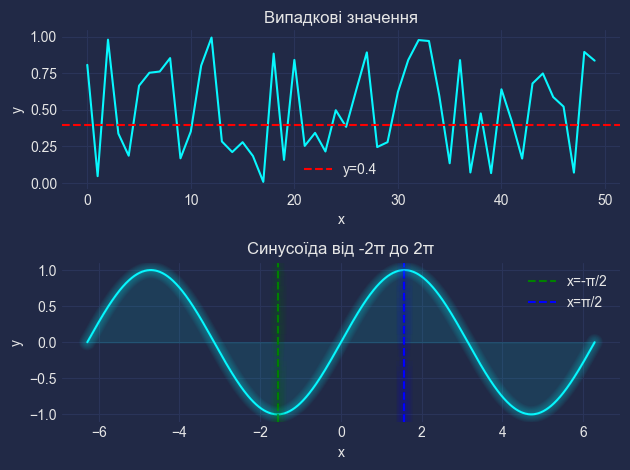

In [2]:
def plot_graph1():
    # Генеруємо 50 випадкових значень для y
    y = np.random.rand(50)

    # Створюємо перший графік
    plt.plot(y)

    # Додаємо горизонтальну лінію y=0.4
    plt.axhline(y=0.4, color='r', linestyle='--', label='y=0.4')

    # Підписи до графіку та легенда
    plt.title('Випадкові значення')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


def plot_graph2():
    # Генеруємо значення x від -2π до 2π
    x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

    # Створюємо другий графік (синусоїда)
    plt.plot(x, np.sin(x))

    # Додаємо вертикальні лінії x=-π/2 і x=π/2
    plt.axvline(x=-np.pi / 2, color='g', linestyle='--', label='x=-π/2')
    plt.axvline(x=np.pi / 2, color='b', linestyle='--', label='x=π/2')

    # Підписи до графіку та легенда
    plt.title('Синусоїда від -2π до 2π')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


if __name__ == "__main__":
    plt.style.use("cyberpunk")

    plt.subplot(2, 1, 1)  # Вказуємо, що перший графік буде в верхній підсітці
    plot_graph1()

    plt.subplot(2, 1, 2)  # Вказуємо, що другий графік буде в нижній підсітці
    plot_graph2()

    mplcyberpunk.add_glow_effects()
    plt.tight_layout()

    plt.show()

# ЗАВДАННЯ 2

Вивести векторне поле на площині в присутності позитивних та негативних нерухомих зарядів: мінімум 3 заряди (+) (-) в довільних позиціях. Вивести на графік траєкторію із підібраної початкової позиції, яка дає рух із вигинами.

Графік підписати: вісі, назву, точку позиції.

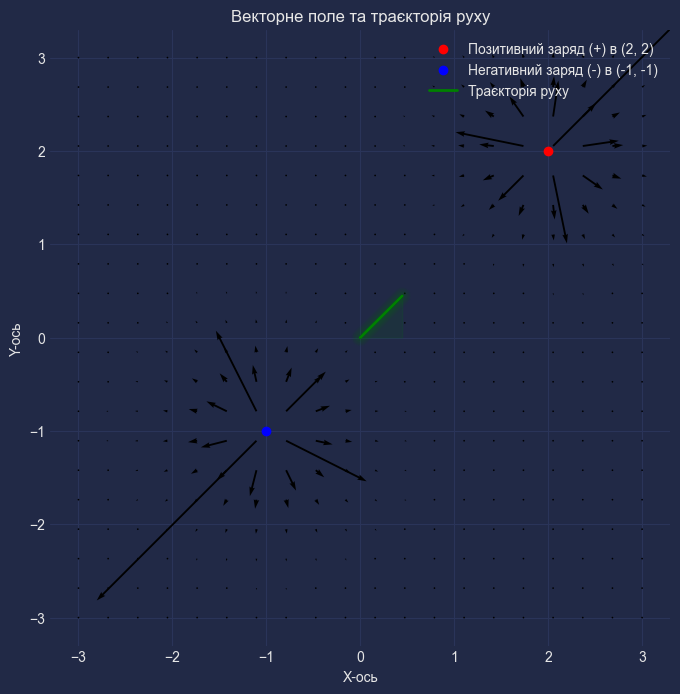

In [3]:
# Параметри зарядів (+) і (-)
q_positive = 1.0  # Позитивний заряд
q_negative = -1.0  # Негативний заряд

# Позиції зарядів
position_positive = np.array([2.0, 2.0])  # Позитивний заряд розташований в точці (2, 2)
position_negative = np.array([-1.0, -1.0])  # Негативний заряд розташований в точці (-1, -1)

# Початкова позиція частинки, яка рухатиметься
initial_position = np.array([0.0, 0.0], dtype=np.float64)  # Зміна типу на float64


# Функція для обчислення електричного поля від заряду в точці (x, y)
def electric_field(charge_position, point):
    r = point - charge_position
    r_magnitude = np.linalg.norm(r)
    electric_field_strength = q_positive / (r_magnitude ** 2) if q_positive > 0 else 0
    electric_field_direction = r / r_magnitude
    electric_field_vector = electric_field_strength * electric_field_direction
    return electric_field_vector


# Функція для обчислення траєкторії руху частинки
def calculate_trajectory(initial_position, num_steps, step_size):
    trajectory = [initial_position]
    current_position = initial_position.copy()  # Зміна для забезпечення правильного типу
    for _ in range(num_steps):
        total_electric_field = np.zeros(2)
        total_electric_field += electric_field(position_positive, current_position)
        total_electric_field += electric_field(position_negative, current_position)
        current_position += step_size * total_electric_field
        trajectory.append(current_position)
    return np.array(trajectory)


# Параметри для обчислення траєкторії
num_steps = 100
step_size = 0.05

# Обчислення траєкторії руху
trajectory = calculate_trajectory(initial_position, num_steps, step_size)

# Побудова графіка векторного поля
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)
for i in range(len(x)):
    for j in range(len(y)):
        point = np.array([X[i, j], Y[i, j]])
        electric_field_vector = electric_field(position_positive, point) + electric_field(position_negative, point)
        Ex[i, j], Ey[i, j] = electric_field_vector

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, Ex, Ey, scale=20, scale_units='inches')
plt.scatter(position_positive[0], position_positive[1], c='red', marker='o', label='Позитивний заряд (+) в (2, 2)')
plt.scatter(position_negative[0], position_negative[1], c='blue', marker='o', label='Негативний заряд (-) в (-1, -1)')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'g-', label='Траєкторія руху', linewidth=2)
plt.xlabel('X-ось')
plt.ylabel('Y-ось')
plt.title('Векторне поле та траєкторія руху')
plt.legend()
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()

# ЗАВДАННЯ 3 (підвищеної складності)

Створити анімовану 3D модель поверхні, що змінюється в залежності від визначеного параметру:
   1. Підібрати унікальну функцію 3D поверхні із складним рельєфом, відобразити її через plot_surface() та розмалювати через персональний colormap.
   2. Налаштувати оптимальний кут зору на графік, підписати графік власним ім'ям.
   3. Ввести у формулу параметр, який значно змінює розташування хвиль, горбів на рельєфі.
   4. Оформити функцію animate() для перерисовки графіка та виводу показника параметра.
   5. Порахувати та зберегти якісну анімацію в файл gif та html.

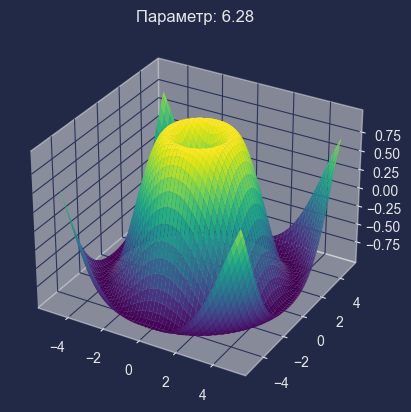

In [4]:
# Функція для створення 3D-поверхні з параметром
def generate_surface(parameter):
    # Ваша формула для створення поверхні залежно від параметра
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = np.sin(np.sqrt(x ** 2 + y ** 2) + parameter)
    return x, y, z


# Функція для оновлення анімації
def animate(parameter):
    ax.cla()  # Очищення попередньої поверхні
    x, y, z = generate_surface(parameter)
    surface = ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_title(f'Параметр: {parameter:.2f}')
    return surface


# Створення фігури та 3D-поверхні
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Задайте діапазон параметра і створіть анімацію
parameter_range = np.linspace(0, 2 * np.pi, 100)
ani = FuncAnimation(fig, animate, frames=parameter_range, interval=100)

# Збереження анімації в GIF
ani.save('animated_surface.gif', writer='pillow')

# ani.save('animated_surface.html', writer=PillowWriter(fps=10))

plt.show()
